# Artificial Neural Networks

## Process
1. Initalize a Network
2. Compute Weighted Sum at Each Node. 
3. Compute Node Activation 
4. Access your Flask app via a webpage anywhere using a custom link. 

## Structure
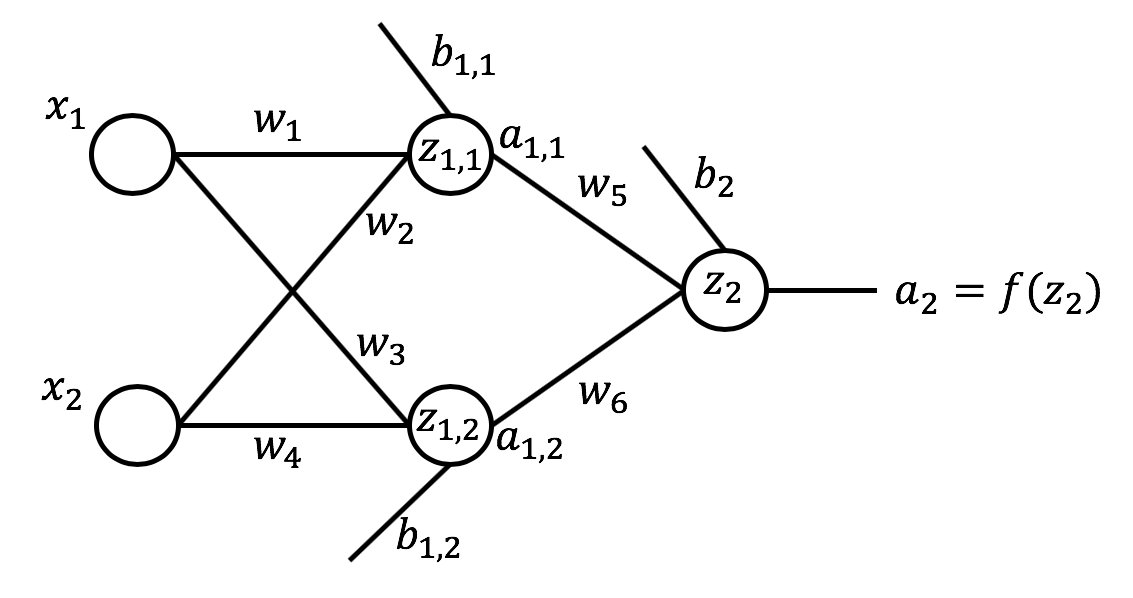

### Step 1. Import Packages

In [1]:
import numpy as np
from random import seed

### Step 2. Initialize weights and biases
- 6 weights and 3 biases, one for each node in the hidden layer and the output layer.
- Intialize them by random numbers on (0, 1)

In [2]:
weights = np.around(np.random.uniform(size = 6), decimals = 2)
biases  = np.around(np.random.uniform(size = 3), decimals = 2)

print(weights)
print(biases)

[0.34 0.18 0.07 0.18 0.53 0.06]
[0.28 0.39 0.22]


### Step 3. Forward Propagation

#### Step 3.1 Linear Combination on the first hidden layer
- Given Input:
    - x1 & x2
- Output on the first hidden layer
    - z11 = x1 * w[0] + x2 + w[1] + b[0]
    - z12 = x1 * w[2] + x2 + w[3] + b[1]

In [3]:
# Given input
x1 = 0.5
x2 = 0.85

# Calculate the output for a given input x1 & x2
z_11 = x1 * weights[0] + x2 * weights[1] + biases[0]
print('The weighted sum of the inputs at the first node in the hidden layer is {}'.format(z_11))

z_12 = x1 * weights[2] + x2 * weights[3] + biases[1]
print('The weighted sum of the inputs at the second node in the hidden layer is {}'.format(z_12))

The weighted sum of the inputs at the first node in the hidden layer is 0.603
The weighted sum of the inputs at the second node in the hidden layer is 0.5780000000000001


#### Step 3.2 Activation Function - Nonlinearize the output
- Use **sigmoid** in this case
- a11 = 1 / (1 + e^z11)

In [4]:
a_11 = 1.0 / (1.0 + np.exp(- z_11))
print('The activation of the first node in the hidden layer is {}'.format(np.around(a_11, decimals = 4)))

a_12 = 1.0 / (1.0 + np.exp(- z_12))
print('The activation of the second node in the hidden layer is {}'.format(np.around(a_12, decimals = 4)))

The activation of the first node in the hidden layer is 0.6463
The activation of the second node in the hidden layer is 0.6406


#### Step 3.3 Linear Combination on the second hidden layer

In [5]:
z_2 = a_11 * weights[4] + a_12 * weights[5] + biases[0]
print('The weighted sum of the inputs at the node in the output layer is {}'.format(np.around(z_2, decimals=4)))

The weighted sum of the inputs at the node in the output layer is 0.661


#### Step 3.4 Nonlinearize the second hidden layer

In [6]:
a_2 = 1.0 / (1.0 + np.exp(- z_2))
print('The output of the network for x1 = 0.5 and x2 = 0.85 is {}'.format(np.around(a_2, decimals=4)))

The output of the network for x1 = 0.5 and x2 = 0.85 is 0.6595


### Generalized Structure
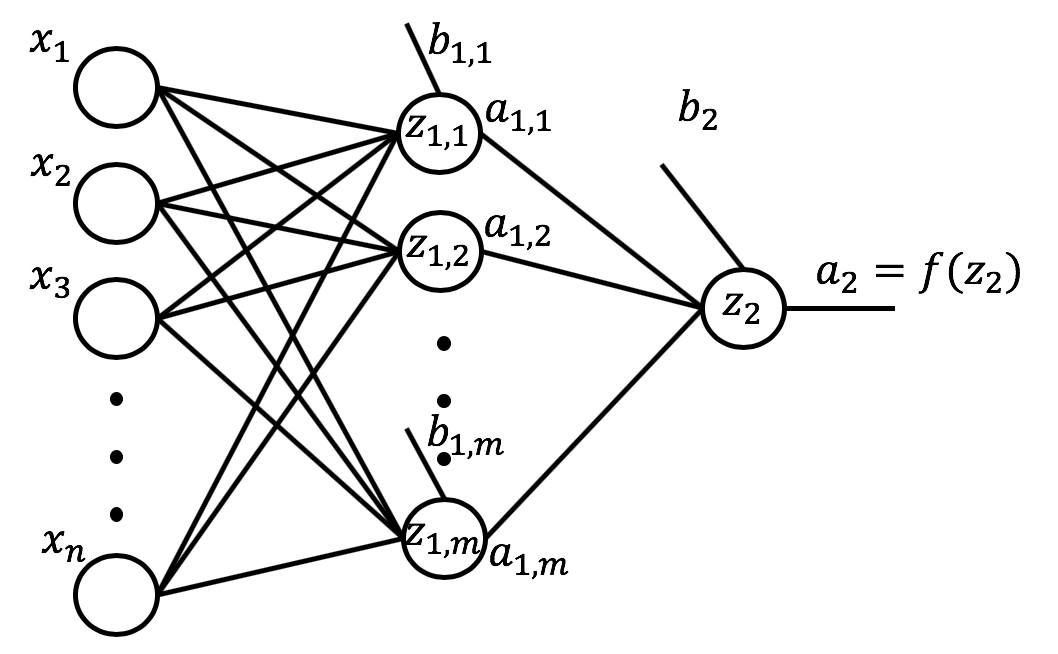

### Step 4. Initialize a Network

In [7]:
# number of inputs
n = 2

# number of hidden layers
num_hidden_layers = 2 

# number of nodes in each hidden layer
m = [2, 2]

# number of nodes on the output layer
num_nodes_output = 1

In [8]:
def initialize_network(num_inputs, num_hidden_layers, num_nodes_hidden, num_nodes_output):
    
    # number of nodes in the previous layer
    num_nodes_previous = num_inputs

    # initialize the network as an empty dictionary
    network = {}

    # loop thorugh each layer and randomly initialize the weights and biases
    for layer in range(num_hidden_layers + 1):

        # determine name of layer
        if layer == num_hidden_layers:
            layer_name = "output"
            num_nodes = num_nodes_output
        else:
            layer_name = "layer_{}".format(layer + 1)
            num_nodes = num_nodes_hidden[layer]

        # initialize weights and biases 
        network[layer_name] = {}
        for node in range(num_nodes):
            node_name = "node_{}".format(node + 1)
            network[layer_name][node_name] = {
                "weights": np.round(np.random.uniform(size = num_nodes_previous), decimals = 2),
                "bias":  np.round(np.random.uniform(size = 1), decimals = 2),
            }
        num_nodes_previous = num_nodes

    return network

In [9]:
# For example: use the initilaize_network function to create a network with:
# # 5 inputs
# # 3 hidden layers
# # 3 nodes in the first layer, 2 nodes in the second layer, 3 nodes in the first layer
# # 1 node in the output layer

small_network = initialize_network(5, 3, [3, 2, 3], 1)
print(small_network)



{'layer_1': {'node_1': {'weights': array([0.93, 0.18, 0.37, 0.97, 0.47]), 'bias': array([0.63])}, 'node_2': {'weights': array([0.9 , 0.52, 0.89, 0.27, 0.69]), 'bias': array([0.14])}, 'node_3': {'weights': array([0.82, 0.83, 0.96, 0.57, 0.08]), 'bias': array([0.46])}}, 'layer_2': {'node_1': {'weights': array([0.24, 0.2 , 0.53]), 'bias': array([0.95])}, 'node_2': {'weights': array([0.59, 0.3 , 0.18]), 'bias': array([0.22])}}, 'layer_3': {'node_1': {'weights': array([0.63, 0.06]), 'bias': array([0.76])}, 'node_2': {'weights': array([0.22, 0.78]), 'bias': array([0.86])}, 'node_3': {'weights': array([0.08, 0.89]), 'bias': array([0.13])}}, 'output': {'node_1': {'weights': array([0.2 , 0.77, 0.02]), 'bias': array([0.18])}}}


### Step 5. Compute weighted sum at each node

In [36]:
def compute_weighted_sum(inputs, weights, bias):
    return np.sum(inputs * weights) + bias

In [47]:
# Generate 5 inputs to feed small_network
np.random.seed(12)
inputs = np.around(np.random.uniform(size = 5), decimals = 2)
print(inputs.shape)
print("The inputs to the network are {}".format(inputs))

(5, 1)
The inputs to the network are [[0.15]
 [0.74]
 [0.26]
 [0.53]
 [0.01]]


In [54]:
# Use the compute_weighted_sum function to compute the weighetd sum at the first node in the first layer
node_weights = small_network["layer_1"]["node_1"]["weights"]
node_bias    = small_network["layer_1"]["node_1"]["bias"]
node_weights = node_weights.reshape(5, 1)
node_bias    = node_bias.reshape(1, 1)
weighted_sum = compute_weighted_sum(inputs, node_weights, node_bias)
print('The weighted sum at the first node in the first hidden layer is {}'.format(np.around(weighted_sum[0], decimals = 4)))


The weighted sum at the first node in the first hidden layer is [1.5177]


### Step 6. Compute Node Activation

In [55]:
def node_activation(weighted_sum):
    return 1.0 / (1.0 + np.exp(- 1 * weighted_sum))

In [56]:
# use the node_activation function to compute the output of the
# output of the first node in the hidden layer

node_output = node_activation(
    compute_weighted_sum(inputs, node_weights, node_bias))
print("The output of the first node in the hidden layer is {}".
      format(np.around(node_output[0], decimals = 4)))


The output of the first node in the hidden layer is [0.8202]


### Step 7. Forward Propagation
1. Start with the input layer as the input to the first hidden layer
2. Compute the weighted sum at the nodes of the current layer
3. Compute the output of the nodes of the current layer
4. Set the output of the nodes of the current layer to be the input to the next layer
5. Move to the next layer in the network
6. Repeat steps 2 - 4 until we compute the output of the output layer

In [57]:
def forward_propagation(network, inputs):
    # 1. Start with the input layer as the input to the first hidden layer
    layer_inputs = list(inputs) 
    
    # Assign input data to each node in the each layer
    for layer in network:
        layer_data = network[layer]
        layer_outputs = []
        for layer_node in layer_data:
            node_data = layer_data[layer_node]
            
            # 2. Compute the weighted sum at the nodes of the current layer
            node_output = node_activation(
                compute_weighted_sum(layer_inputs, node_data["weights"], node_data["bias"]))
            layer_outputs.append(np.around(node_output[0], decimals = 4))
            
        if layer != "output":
            print("The outputs of the nodes in hidden layer number {} is {}".format(
                layer.split("_")[1], 
                layer_outputs))
    
    # Obtain the output layer result
    network_predictions = layer_outputs
    return network_predictions


In [58]:
# Use forward_propagation function to compute the prediction of the samll network
predictions = forward_propagation(small_network, inputs)
print("The prediction value by the network for the given input is {}".format(np.around(predictions[0], decimals = 4)))


The outputs of the nodes in hidden layer number 1 is [0.9962, 0.9966, 0.9975]
The outputs of the nodes in hidden layer number 2 is [0.9302, 0.8837]
The outputs of the nodes in hidden layer number 3 is [0.8728, 0.9276, 0.8544]
The prediction value by the network for the given input is 0.8645


In [60]:
# Another Example
# Build the network by specifying 
# the number of inputs 
# the number of hidden layers
# the number of nodes in each layer, 
# the number of output layer
my_network = initialize_network(5, 3, [2, 3, 3], 3)

# provide the given input
inputs = np.around(np.random.uniform(size = 5), decimals = 2)
inputs = inputs.reshape(5, 1)
# compute the network predictions
predictions = forward_propagation(my_network, inputs)
print("the predicted values by the network for the given input are {}".format(predictions))


The outputs of the nodes in hidden layer number 1 is [0.9772, 0.9982]
The outputs of the nodes in hidden layer number 2 is [0.982, 0.9565, 0.9759]
The outputs of the nodes in hidden layer number 3 is [0.9189, 0.9986, 0.9972]
the predicted values by the network for the given input are [0.9873, 0.9981, 0.9947]
